In [1]:
import pandas as pd
import numpy as np
import copy as cp

import statsmodels.api as sm
import matplotlib.pyplot as plt

import sklearn.metrics as metrics

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from heatmap import heatmap, corrplot

In [2]:
onedrive_path = "C:/Users/cfowle/The Estée Lauder Companies Inc/TeamAnis - General/"

In [257]:
rr_cc = pd.read_csv(onedrive_path + "Output/2020_07_06_to_rama/counts.csv")
rr_cc = rr_cc.sort_values("date")

In [258]:
rr_cc = rr_cc.iloc[:, 5:24]
rr_cc.columns
percent_pos = rr_cc.sentiment_positive/rr_cc.nb_reviews

In [259]:
rr_cc = rr_cc.loc[rr_cc["demand"] > 0]
rr_cc = rr_cc.loc[rr_cc.demand_F1  > 0]
rr_cc = rr_cc.loc[rr_cc.demand_P1  > 0]
rr_cc = rr_cc.loc[rr_cc.demand_P2  > 0]
rr_cc = rr_cc.loc[rr_cc["nb_reviews"] > 0]

In [260]:
rr_cc = rr_cc + 1

In [261]:
rr_cc = np.log(rr_cc) 
rr_cc["intercept"] = 1
rr_cc["percent_pos"] = percent_pos

C:\Users\cfowle\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
C:\Users\cfowle\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


# Baseline

In [178]:
rr_cc.columns

Index(['avg_nb_statements', 'nb_reviews', 'rating', 'rating_1', 'rating_2',
       'rating_3', 'rating_4', 'rating_5', 'sentiment_negative',
       'sentiment_neutral', 'sentiment_positive', 'sentiment', 'demand_P1',
       'demand_P2', 'demand', 'demand_F1', 'demand_F2', 'Complaints',
       'Compliments', 'intercept'],
      dtype='object')

In [179]:
X = rr_cc[["intercept", "demand_F1", "demand", "demand_P1", "demand_P2"]]
y = X.pop("demand_F1")

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)

In [181]:
lm = LinearRegression()
lm.fit(X_train, y_train)
pred = lm.predict(X_test)
metrics.r2_score(pred, y_test)

0.7877768126936798

In [182]:
est = sm.OLS(y_train, X_train)
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              demand_F1   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                 1.649e+04
Date:                Mon, 13 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:26:58   Log-Likelihood:                -10841.
No. Observations:                8973   AIC:                         2.169e+04
Df Residuals:                    8969   BIC:                         2.172e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1138      0.043      2.617      0.0

# Consumer Care

In [208]:
X = rr_cc[["intercept", "demand_F1", "demand", "demand_P1", "demand_P2", "Compliments", "Complaints"]].loc[rr_cc.Complaints > 0]
y = X.pop("demand_F1")

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)

lm = LinearRegression(fit_intercept = False)
lm.fit(X_train, y_train)
pred = lm.predict(X_test)
metrics.r2_score(pred, y_test)

0.9004730752964998

In [209]:
est = sm.OLS(y_train, X_train)
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              demand_F1   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     2474.
Date:                Mon, 13 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:36:47   Log-Likelihood:                -749.06
No. Observations:                 944   AIC:                             1510.
Df Residuals:                     938   BIC:                             1539.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       0.0435      0.116      0.376      

In [210]:
X = X[["intercept", "demand", "demand_P1", "demand_P2", "Complaints"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)

lm = LinearRegression(fit_intercept = False)
lm.fit(X_train, y_train)
pred = lm.predict(X_test)
metrics.r2_score(pred, y_test)

0.9004340130681967

In [191]:
est = sm.OLS(y_train, X_train)
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              demand_F1   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     3096.
Date:                Mon, 13 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:28:22   Log-Likelihood:                -749.08
No. Observations:                 944   AIC:                             1508.
Df Residuals:                     939   BIC:                             1532.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0416      0.115      0.361      0.7

# Stars

In [211]:
X = rr_cc[["intercept", "demand_F1", "demand", "demand_P1", "demand_P2", 
          "rating_1", "rating_2", "rating_3","rating_4", "rating_5"]].replace(-1*np.inf,np.nan).dropna()
y = X.pop("demand_F1")

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)

lm = LinearRegression(fit_intercept = False)
lm.fit(X_train, y_train)
pred = lm.predict(X_test)
metrics.r2_score(pred, y_test)

0.7885845388125918

In [212]:
est = sm.OLS(y_train, X_train)
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              demand_F1   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     6194.
Date:                Mon, 13 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:37:11   Log-Likelihood:                -10832.
No. Observations:                8973   AIC:                         2.168e+04
Df Residuals:                    8964   BIC:                         2.175e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1817      0.047      3.873      0.0

# Sentiment

In [232]:
X = rr_cc[["intercept", "demand_F1", "demand", "demand_P1", "demand_P2", 
           "sentiment_positive", "sentiment_neutral", "sentiment_negative"]].replace(-1*np.inf,np.nan).dropna()
y = X.pop("demand_F1")

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)

lm = LinearRegression(fit_intercept = False)
lm.fit(X_train, y_train)
pred = lm.predict(X_test)
metrics.r2_score(pred, y_test)

0.7891167391942577

In [233]:
est = sm.OLS(y_train, X_train)
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              demand_F1   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     8265.
Date:                Mon, 13 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:54:01   Log-Likelihood:                -10830.
No. Observations:                8973   AIC:                         2.167e+04
Df Residuals:                    8966   BIC:                         2.172e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept              0.1574      0

In [215]:
X = rr_cc[["intercept", "demand_F1", "demand", "demand_P1", "demand_P2", "sentiment_positive", "sentiment_neutral"]].replace(-1*np.inf,np.nan).dropna()
y = X.pop("demand_F1")

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)

lm = LinearRegression(fit_intercept = False)
lm.fit(X_train, y_train)
pred = lm.predict(X_test)
metrics.r2_score(pred, y_test)

0.7891168079963005

In [216]:
est = sm.OLS(y_train, X_train)
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              demand_F1   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     9919.
Date:                Mon, 13 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:37:21   Log-Likelihood:                -10830.
No. Observations:                8973   AIC:                         2.167e+04
Df Residuals:                    8967   BIC:                         2.171e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept              0.1574      0

# Rating Measures

In [217]:
rr_cc.columns

Index(['avg_nb_statements', 'nb_reviews', 'rating', 'rating_1', 'rating_2',
       'rating_3', 'rating_4', 'rating_5', 'sentiment_negative',
       'sentiment_neutral', 'sentiment_positive', 'sentiment', 'demand_P1',
       'demand_P2', 'demand', 'demand_F1', 'demand_F2', 'Complaints',
       'Compliments', 'intercept'],
      dtype='object')

In [218]:
X = rr_cc[["intercept", "demand_F1", "demand", "demand_P1", "demand_P2", "nb_reviews", "rating", "avg_nb_statements"]].replace(-1*np.inf,np.nan).dropna()
y = X.pop("demand_F1")

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)

lm = LinearRegression(fit_intercept = False)
lm.fit(X_train, y_train)
pred = lm.predict(X_test)
metrics.r2_score(pred, y_test)

0.7891594343634334

In [219]:
est = sm.OLS(y_train, X_train)
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              demand_F1   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     8262.
Date:                Mon, 13 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:37:50   Log-Likelihood:                -10832.
No. Observations:                8973   AIC:                         2.168e+04
Df Residuals:                    8966   BIC:                         2.173e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept             0.1674      0.04

# Landing on Sentiment Positive

In [236]:
X = rr_cc[["intercept", "demand_F1","demand", "demand_P1",
           "demand_P2", "sentiment_positive", "nb_reviews"]].replace(-1*np.inf,np.nan).dropna()
y = X.pop("demand_F1")
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)

lm = LinearRegression(fit_intercept = False)
lm.fit(X_train, y_train)
pred = lm.predict(X_test)
metrics.r2_score(pred, y_test)

0.7893170191164469

In [237]:
est = sm.OLS(y_train, X_train)
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              demand_F1   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     9916.
Date:                Mon, 13 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:54:38   Log-Likelihood:                -10831.
No. Observations:                8973   AIC:                         2.167e+04
Df Residuals:                    8967   BIC:                         2.172e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept              0.1798      0

In [238]:
est = sm.OLS(y, X)
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              demand_F1   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                 1.280e+04
Date:                Mon, 13 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:54:53   Log-Likelihood:                -14689.
No. Observations:               11965   AIC:                         2.939e+04
Df Residuals:                   11959   BIC:                         2.943e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept              0.1773      0

In [262]:
X = rr_cc[["intercept", "demand_F1","demand", "demand_P1",
           "demand_P2", "percent_pos"]].replace(-1*np.inf,np.nan).dropna()
y = X.pop("demand_F1")
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)

lm = LinearRegression(fit_intercept = False)
lm.fit(X_train, y_train)
pred = lm.predict(X_test)
metrics.r2_score(pred, y_test)

0.7879409257640534

In [263]:
est = sm.OLS(y_train, X_train)
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              demand_F1   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                 1.237e+04
Date:                Mon, 13 Jul 2020   Prob (F-statistic):               0.00
Time:                        16:07:00   Log-Likelihood:                -10840.
No. Observations:                8973   AIC:                         2.169e+04
Df Residuals:                    8968   BIC:                         2.173e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       0.0765      0.064      1.202      

# Heatmap

In [73]:
rr_cc.columns

Index(['avg_nb_statements', 'nb_reviews', 'rating', 'rating_1', 'rating_2',
       'rating_3', 'rating_4', 'rating_5', 'sentiment_negative',
       'sentiment_neutral', 'sentiment_positive', 'sentiment', 'demand_P1',
       'demand_P2', 'demand', 'demand_F1', 'demand_F2', 'Complaints',
       'Compliments'],
      dtype='object')

In [77]:
test = rr_cc[['demand_F1','rating_1', 'rating_2',
       'rating_3', 'rating_4', 'rating_5', 'sentiment_negative',
       'sentiment_neutral', 'sentiment_positive', 'demand_P1',
       'demand_P2', 'demand', 'Complaints', "nb_reviews",
       'Compliments']]

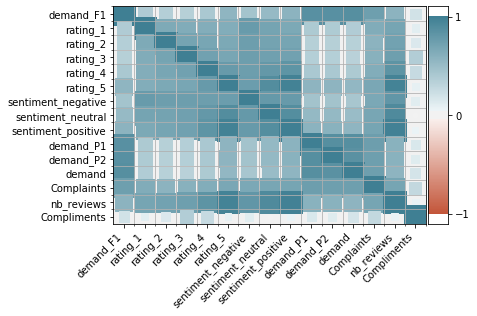

In [78]:
corrplot(test.corr())

# PCA On Ratings

In [73]:
y = rr_cc["demand_F1"]
X = rr_cc[["demand", "demand_P1", "demand_P2", 
          "rating_1", "rating_2", "rating_3","rating_4", "rating_5"]]

In [74]:
X = StandardScaler().fit_transform(X)

Text(0, 0.5, 'cumulative explained variance')

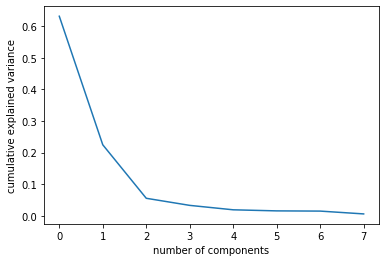

In [76]:
pca = PCA().fit(X)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [81]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(principalDf, y, shuffle = False)

In [83]:
lm = LinearRegression()
lm.fit(X_train, y_train)
pred = lm.predict(X_test)
metrics.r2_score(pred, y_test)

0.8705259049056439

In [84]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train.values, X2)
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                 1.478e+04
Date:                Fri, 10 Jul 2020   Prob (F-statistic):               0.00
Time:                        14:31:19   Log-Likelihood:            -1.1967e+05
No. Observations:                9317   AIC:                         2.393e+05
Df Residuals:                    9313   BIC:                         2.394e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.927e+04    949.919     72.925      0.0

In [85]:
for i,x in enumerate(pca.components_):
    print("Feature " + str(i), ", Explains " + str(pca.explained_variance_[i]) + "%")
    top = x.argsort()[-5:][::-1]
    table = [list(rr_cc[["demand", "demand_P1", "demand_P2", 
          "rating_1", "rating_2", "rating_3","rating_4", "rating_5"]].columns[top]), x[top]]
    df = pd.DataFrame(np.transpose(table))
    print(df)

Feature 0 , Explains 5.051049594617699%
          0                    1
0  rating_5  0.40818498297953165
1  rating_1   0.3648830202084203
2  rating_3   0.3568849884242424
3  rating_4  0.35552627437401446
4  rating_2   0.3549150672946065
Feature 1 , Explains 1.7974049808543018%
          0                     1
0  rating_3    0.3956073677975336
1  rating_4   0.36972216067101377
2  rating_2    0.2826077068027838
3  rating_5   0.13940139731265558
4  rating_1  0.030271797135727554
Feature 2 , Explains 0.44365874937527067%
           0                    1
0   rating_4  0.41774140544011423
1   rating_5    0.324442600300567
2  demand_P1  0.11845240855464464
3   rating_3  0.10290440964653991
4     demand  0.09653811765731585
